In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [4]:
file_path = '/Users/JBnimoussa/Desktop/HU sem/ACM/COOKIEDATASET FINAL.csv'
data = pd.read_csv('COOKIEDATASET FINAL.csv')

In [5]:
target = 'Flavor Preferences'
features = data.columns.drop(target)

In [6]:

label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
        
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/Users/JBnimoussa/Desktop/HU sem/ACM/COOKIEDATASET FINAL.csv'
cookie_data = pd.read_csv(file_path)

# Dropping rows with any missing values for simplicity
cookie_data_clean = cookie_data.dropna()

# Encoding categorical variables using LabelEncoder
label_encoders = {}
for column in cookie_data_clean.columns:
    if cookie_data_clean[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        cookie_data_clean[column] = label_encoders[column].fit_transform(cookie_data_clean[column])

# Separating the features and the target variable (Flavor Preferences)
X = cookie_data_clean.drop('Flavor Preferences', axis=1)
y = cookie_data_clean['Flavor Preferences']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluating the model performance
classification_report_result = classification_report(y_test, y_pred, target_names=label_encoders['Flavor Preferences'].classes_)

# Printing the classification report
print(classification_report_result)

                 precision    recall  f1-score   support

         Almond       0.95      0.92      0.93       114
 Chocolate Chip       0.96      0.97      0.96       634
       Cinnamon       0.93      0.94      0.93       124
         Matcha       0.96      0.96      0.96       245
        Oatmeal       0.95      0.94      0.94       237
   Sugar Cookie       0.94      0.94      0.94       357
White Chocolate       0.95      0.95      0.95       289

       accuracy                           0.95      2000
      macro avg       0.95      0.94      0.95      2000
   weighted avg       0.95      0.95      0.95      2000



In [7]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_pred = rf_model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [11]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.954

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       176
           1       0.95      0.97      0.96       953
           2       0.96      0.95      0.95       187
           3       0.99      0.96      0.97       375
           4       0.96      0.94      0.95       358
           5       0.96      0.95      0.95       523
           6       0.95      0.95      0.95       428

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree  # Import the plot_tree function
import matplotlib.pyplot as plt



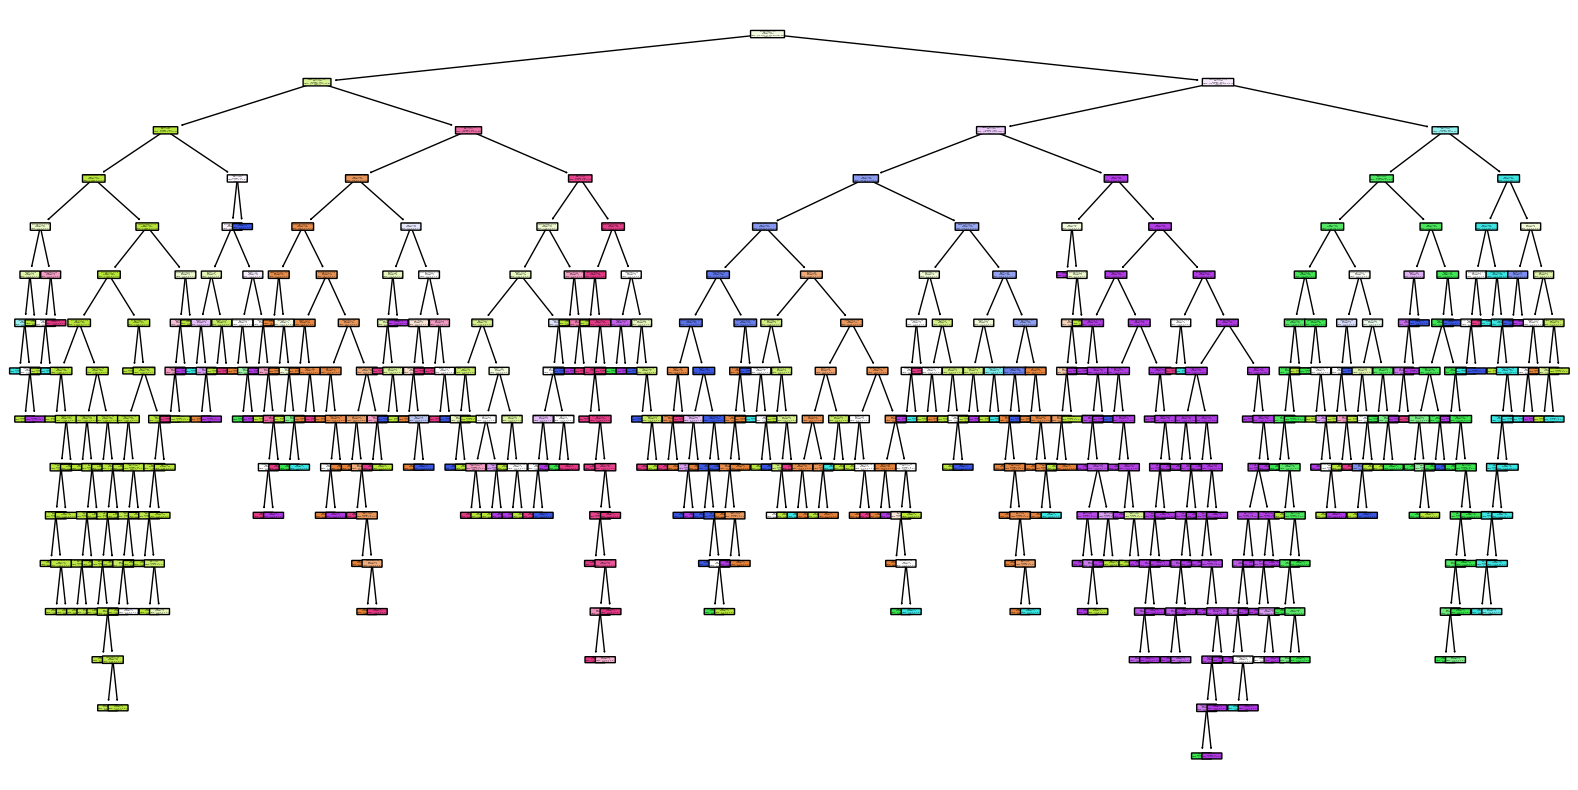

In [13]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define features and target
X = data.drop(columns=['Flavor Preferences'])  # Features
y = data['Flavor Preferences']  # Target

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Ensure that class names are strings
class_names = [str(cls) for cls in y.unique()]

# Visualize one of the trees in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.show()


In [15]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'cookie_decision_tree_model.pkl')

# Save label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')



['label_encoders.pkl']

In [16]:
import joblib
from sklearn.tree import DecisionTreeClassifier  # or the actual model class

# Load the existing model
model = joblib.load('/Users/JBnimoussa/Desktop/HU sem/ACM/cookie_decision_tree_model.pkl')

# Re-save it using the new version of scikit-learn
joblib.dump(model, '/Users/JBnimoussa/Desktop/HU sem/ACM/cookie_decision_tree_model_v1_5_2.pkl')


['/Users/JBnimoussa/Desktop/HU sem/ACM/cookie_decision_tree_model_v1_5_2.pkl']